# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.2894999935291708


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

DDPG Agent hyperparameters:
	batch size: 		     128
	buffer size: 		  100000
	discount / gamma: 	   0.990
	actor learning rate: 	   0.001
	critic learning rate: 	   0.001
	soft update / tau: 	   0.001
	noise decay rate: 	   0.999

Actor network built: ModuleList(
  (0): Linear(in_features=33, out_features=256, bias=True)
  (1): Linear(in_features=256, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=4, bias=True)
)
Actor network built: ModuleList(
  (0): Linear(in_features=33, out_features=256, bias=True)
  (1): Linear(in_features=256, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=4, bias=True)
)
Critic network built: ModuleList(
  (0): Linear(in_features=33, out_features=256, bias=True)
  (1): Linear(in_features=260, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=1, bias=True)
)
Critic network built: ModuleList(
  (0): Linear(in_features=33, out_features=256, bias=True)
  (1): Linear(in_features=260, out_feat

In [7]:
TARGET_SCORE = 30.0
TARGET_EPISODES = 100

def ddpg(n_episodes=1000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations 
        agent.reset()
        scores_episode = np.zeros(num_agents)
        
        for t in range(1, max_t+1):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            done = env_info.local_done
            for (state, action, reward, next_state, d) in zip(states, actions, rewards, next_states, done):
                agent.step(state, action, reward, next_state, d)
            states = next_states
            scores_episode += rewards
            if t % print_every == 0:
                print('\rEpisode {}\tt {}/{}'.format(i_episode, t, max_t), end="")
            if done:
                break 
        scores_deque.append(np.mean(scores[-print_every:], axis=0))
        scores.append(scores_episode.tolist())
        moving_avg = np.mean(scores[-TARGET_EPISODES:], axis=0).mean()
        
        ## Print the results for this episode
        print('\nEpisode {:3d} \tScore: {:5.2f}'.format(i_episode, scores_episode.mean()))
        
        ## Check if the environment has been solved
        if moving_avg >= TARGET_SCORE and i_episode >= TARGET_EPISODES:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
                  .format(i_episode - TARGET_EPISODES, moving_avg))
            
            print('\nSaving model ...', end=' ')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('done.')
            break
            
    return scores


Episode 1	t 1000/1000
Episode   1 	Score:  1.28
Episode 2	t 1000/1000
Episode   2 	Score:  1.97
Episode 3	t 1000/1000
Episode   3 	Score:  4.92
Episode 4	t 1000/1000
Episode   4 	Score:  3.77
Episode 5	t 1000/1000
Episode   5 	Score:  4.18
Episode 6	t 1000/1000
Episode   6 	Score:  7.24
Episode 7	t 1000/1000
Episode   7 	Score:  8.12
Episode 8	t 1000/1000
Episode   8 	Score: 10.49
Episode 9	t 1000/1000
Episode   9 	Score: 10.41
Episode 10	t 1000/1000
Episode  10 	Score: 13.13
Episode 11	t 1000/1000
Episode  11 	Score: 11.00
Episode 12	t 1000/1000
Episode  12 	Score: 11.72
Episode 13	t 1000/1000
Episode  13 	Score: 13.59
Episode 14	t 1000/1000
Episode  14 	Score: 15.36
Episode 15	t 1000/1000
Episode  15 	Score: 13.83
Episode 16	t 1000/1000
Episode  16 	Score: 13.94
Episode 17	t 1000/1000
Episode  17 	Score: 16.26
Episode 18	t 1000/1000
Episode  18 	Score: 18.46
Episode 19	t 1000/1000
Episode  19 	Score: 26.65
Episode 20	t 1000/1000
Episode  20 	Score: 20.14
Episode 21	t 1000/1000
Episod

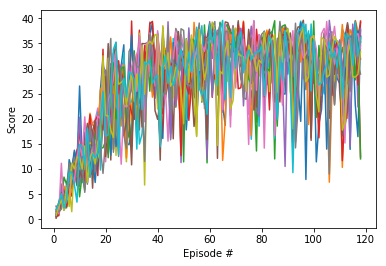

In [8]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
scores_mean = np.mean(scores, axis=1)
target = [_target_score] * len(scores) # Trace a line indicating the target value

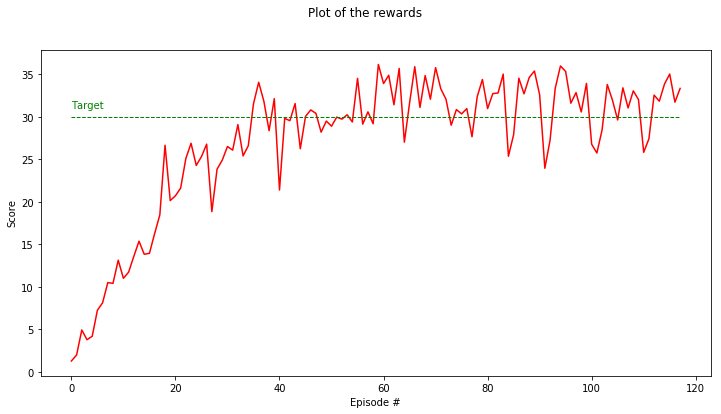

In [16]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Plot of the rewards')

ax = fig.add_subplot(111)
ax.plot(scores_mean, label='Score', color='Red')
ax.plot(target, linestyle='--', color='Green', linewidth=1)
ax.text(0, _target_score+1, 'Target', color='Green')
ax.set_ylabel('Score')
ax.set_xlabel('Episode #')

plt.show()